In [1]:
# import dependencies
%matplotlib inline
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from sodapy import Socrata
import gmaps
from config import g_keys
import matplotlib

In [2]:
# used 'None', appication token with no password or username
client = Socrata("data.melbourne.vic.gov.au", None)
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("b2ak-trbp", year=2019, limit=10000000)
# Convert to pandas DataFrame
results_2019_df = pd.DataFrame.from_records(results)
# len(results_df)
results_2019_df = results_2019_df.astype({"id":int,"year":int,
                                          "mdate":int,"time":int,
                                          "hourly_counts":float})
# results_2019_df.to_csv('2019_foottraffick.csv')
results_2019_df.head()
#len(results_2019_df)

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,2887628,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,Flinders St-Spark La,300.0
1,2887629,2019-11-01T17:00:00.000,2019,November,1,Friday,17,39,Alfred Place,604.0
2,2887630,2019-11-01T17:00:00.000,2019,November,1,Friday,17,37,Lygon St (East),216.0
3,2887631,2019-11-01T17:00:00.000,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627.0
4,2887632,2019-11-01T17:00:00.000,2019,November,1,Friday,17,36,Queen St (West),774.0


In [3]:
results = client.get("b2ak-trbp", year=2020, limit=10000000)
# Convert to pandas DataFrame
results_2020_df = pd.DataFrame.from_records(results)
results_2020_df = results_2020_df.astype({"id":int,"year":int,
                                          "mdate":int,"time":int,
                                          "hourly_counts":float})

# results_2020_df.to_csv('2020_foottraffick.csv')
results_2020_df.head()
#len(results_2020_df)

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,2966839,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,4,Town Hall (West),3120.0
1,2966840,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,17,Collins Place (South),945.0
2,2966841,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,18,Collins Place (North),464.0
3,2966842,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,53,Collins St (North),1590.0
4,2966843,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,2,Bourke Street Mall (South),725.0


In [4]:
results = client.get("b2ak-trbp", year=2021, limit=10000000)
# Convert to pandas DataFrame
results_2021_df = pd.DataFrame.from_records(results)
results_2021_df = results_2021_df.astype({"id":int,"year":int,
                                          "mdate":int,"time":int,
                                          "hourly_counts":float})

# results_2020_df.to_csv('2020_foottraffick.csv')
results_2021_df.head()

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,3482939,2021-01-01T00:00:00.000,2021,January,1,Friday,0,4,Town Hall (West),1461.0
1,3482940,2021-01-01T00:00:00.000,2021,January,1,Friday,0,17,Collins Place (South),79.0
2,3482941,2021-01-01T00:00:00.000,2021,January,1,Friday,0,18,Collins Place (North),33.0
3,3482942,2021-01-01T00:00:00.000,2021,January,1,Friday,0,53,Collins St (North),196.0
4,3482943,2021-01-01T00:00:00.000,2021,January,1,Friday,0,2,Bourke Street Mall (South),236.0


In [5]:
results = client.get("b2ak-trbp", year=2022, limit=10000000)
# Convert to pandas DataFrame
results_2022_df = pd.DataFrame.from_records(results)
results_2022_df = results_2022_df.astype({"id":int,"year":int,
                                          "mdate":int,"time":int,
                                          "hourly_counts":float})

# results_2020_df.to_csv('2020_foottraffick.csv')
results_2022_df.head()

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,4279409,2022-05-02T12:00:00.000,2022,May,2,Monday,12,53,Collins St (North),1283.0
1,4279410,2022-05-02T13:00:00.000,2022,May,2,Monday,13,53,Collins St (North),1180.0
2,4279411,2022-05-02T14:00:00.000,2022,May,2,Monday,14,53,Collins St (North),1006.0
3,4279412,2022-05-02T15:00:00.000,2022,May,2,Monday,15,53,Collins St (North),837.0
4,4279413,2022-05-02T16:00:00.000,2022,May,2,Monday,16,53,Collins St (North),772.0


## Data cleaning and wrangling

In [6]:
# create a dataframe for location(sensor_name) and hourly counts
hourly_data=pd.DataFrame(results_2019_df.groupby('sensor_name').mean()['hourly_counts']).reset_index()
top_location=hourly_data.sort_values('hourly_counts', ascending=False)
top_location.head(10).reset_index()

,index,sensor_name,hourly_counts
0,16,Flinders La-Swanston St (West),1935.517857
1,17,Flinders St-Elizabeth St (East),1814.341146
2,21,Flinders la - Swanston St (West) Temp,1619.297149
3,15,Flinders La - Swanston St (West) Temp,1587.354605
4,57,Town Hall (West),1447.970548
5,20,Flinders Street Station Underpass,1437.990753
6,49,Spencer St-Collins St (North),1406.846110
7,5,Bourke Street Mall (North),1350.731314
8,47,Southbank,1251.323744
9,39,Princes Bridge,1234.883333


In [7]:
# create a dataframe for location(sensor_name) and hourly counts
hourly_data1=pd.DataFrame(results_2020_df.groupby('sensor_name').mean()['hourly_counts']).reset_index()
top_location1=hourly_data1.sort_values('hourly_counts', ascending=False)
top_location1.head(10).reset_index()

,index,sensor_name,hourly_counts
0,22,Flinders St-Elizabeth St (East),837.908015
1,18,Flinders La-Swanston St (West),762.512637
2,61,Town Hall (West),598.893898
3,49,Southbank,573.880735
4,40,Princes Bridge,565.731899
5,7,Bourke Street Mall (North),545.519012
6,24,Flinders Street Station Underpass,516.921903
7,14,Elizabeth St-La Trobe St (East),503.188297
8,51,Spencer St-Collins St (North),483.883088
9,34,Melbourne Central,478.120845


In [8]:
# create a dataframe for location(sensor_name) and hourly counts
hourly_data2=pd.DataFrame(results_2021_df.groupby('sensor_name').mean()['hourly_counts']).reset_index()
top_location2=hourly_data2.sort_values('hourly_counts', ascending=False)
top_location2.head(10).reset_index()

,index,sensor_name,hourly_counts
0,18,Flinders La-Swanston St (West),950.287024
1,28,Flinders St-Elizabeth St (East),741.209473
2,62,Southbank,740.735395
3,77,Town Hall (West),702.630137
4,70,State Library - New,701.829301
5,52,Princes Bridge,648.222603
6,7,Bourke Street Mall (North),594.591175
7,14,Elizabeth St-La Trobe St (East),558.258219
8,30,Flinders Street Station Underpass,526.852495
9,47,Melbourne Convention Exhibition Centre,512.827003


In [9]:
# create a dataframe for location(sensor_name) and hourly counts
hourly_data3=pd.DataFrame(results_2022_df.groupby('sensor_name').mean()['hourly_counts']).reset_index()
top_location3=hourly_data3.sort_values('hourly_counts', ascending=False)
top_location3.head(10).reset_index()

,index,sensor_name,hourly_counts
0,19,Flinders La-Swanston St (West),1312.665839
1,55,Southbank,1182.980960
2,67,Town Hall (West),1030.714931
3,45,Princes Bridge,900.117550
4,39,Melbourne Central,883.459161
5,14,Elizabeth St - Flinders St (East) - New footpath,815.621689
6,61,State Library - New,748.142660
7,25,Flinders Street Station Underpass,729.920530
8,7,Bourke Street Mall (North),719.423565
9,41,Melbourne Convention Exhibition Centre,697.614790


In [10]:
all_df=top_location.merge(top_location1, on='sensor_name', how='left')
all_df=all_df.merge(top_location2, on='sensor_name', how='left')
all_df=all_df.sort_values(['hourly_counts_x','hourly_counts_y','hourly_counts'], ascending=False)
all_df=all_df.rename(columns={'hourly_counts_x':'2019','hourly_counts_y':'2020','hourly_counts':'2021'})
all_df=all_df.merge(top_location3, on='sensor_name', how='left')
all_df=all_df.rename(columns={'sensor_name':'location','hourly_counts':'2022'})
all_df=all_df.dropna().head(10)
all_df

,location,2019,2020,2021,2022
0,Flinders La-Swanston St (West),1935.517857,762.512637,950.287024,1312.665839
4,Town Hall (West),1447.970548,598.893898,702.630137,1030.714931
5,Flinders Street Station Underpass,1437.990753,516.921903,526.852495,729.920530
6,Spencer St-Collins St (North),1406.846110,483.883088,361.093151,592.782561
7,Bourke Street Mall (North),1350.731314,545.519012,594.591175,719.423565
8,Southbank,1251.323744,573.880735,740.735395,1182.980960
9,Princes Bridge,1234.883333,565.731899,648.222603,900.117550
10,Melbourne Central,1228.522744,478.120845,403.061047,883.459161
11,The Arts Centre,1110.263699,366.898495,452.682612,611.632174
12,Elizabeth St-La Trobe St (East),977.425725,503.188297,558.258219,628.606660


Text(0, 0.5, 'avg counts')

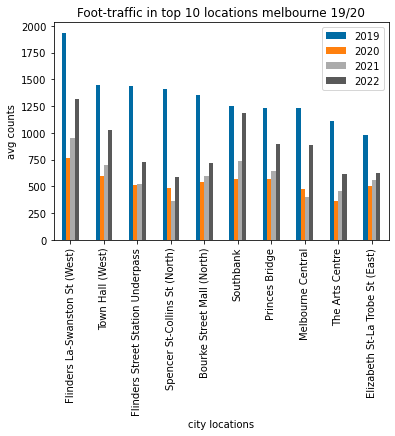

In [11]:
# plotting using matplotlib themes
matplotlib.style.use('tableau-colorblind10') 
all_df.plot(x='location', kind='bar')
plt.title('Foot-traffic in top 10 locations melbourne 19/20')
plt.xlabel('city locations')
plt.ylabel('avg counts')

In [16]:
# get location coordinates

Location_list = top_location3['sensor_name'].tolist()

sensor_name = []
latitude = []
longitude = []
print('------------------\n2022 Mel location\n------------------')
for i in Location_list:
    try:
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"
        target_location = i + ", Melbourne"
        params = {"address": target_location, "key": g_keys}
        response = requests.get(base_url, params=params)
        location_geo = response.json()
        lat = location_geo["results"][0]["geometry"]["location"]["lat"]
        lng = location_geo["results"][0]["geometry"]["location"]["lng"]
        print(f"{target_location}: {lat}, {lng}")
        sensor_name.append(i)
        latitude.append(lat)
        longitude.append(lng)
    except:
        print("Target location not found")
print('------------------------------\nThe End')

------------------
2022 Mel location
------------------
Flinders La-Swanston St (West), Melbourne: -37.8164851, 144.9669885
Southbank, Melbourne: -37.82384, 144.9624973
Town Hall (West), Melbourne: 28.0716832, -80.65338779999999
Princes Bridge, Melbourne: -37.8192405, 144.9683463
Melbourne Central, Melbourne: -37.8123652, 144.9623382
Elizabeth St - Flinders St (East) - New footpath, Melbourne: -37.8181479, 144.9648712
State Library - New, Melbourne: -37.8098087, 144.9651897
Flinders Street Station Underpass, Melbourne: -37.8182711, 144.9670618
Bourke Street Mall (North), Melbourne: -37.8137685, 144.9644379
Melbourne Convention Exhibition Centre, Melbourne: -37.8252393, 144.9519166
Melbourne Central-Elizabeth St (East), Melbourne: -37.8102361, 144.9627652
Elizabeth St-La Trobe St (East), Melbourne: -37.8102887, 144.9614233
The Arts Centre, Melbourne: -37.820183, 144.9681048
Little Collins St-Swanston St (East), Melbourne: -37.8145013, 144.966084
Spencer St-Collins St (North), Melbourne:

In [17]:
# create new df for location coordinate

location_dict = {
    "sensor_name": sensor_name,
    "Lat": latitude,
    "Lon": longitude,
    }
location_df = pd.DataFrame(location_dict)

location_df.head()

,sensor_name,Lat,Lon
0,Flinders La-Swanston St (West),-37.816485,144.966989
1,Southbank,-37.823840,144.962497
2,Town Hall (West),28.071683,-80.653388
3,Princes Bridge,-37.819240,144.968346
4,Melbourne Central,-37.812365,144.962338


In [18]:
# merging foot traffic data and coord data
summary = location_df.merge(top_location3,how='left', on='sensor_name')
summary.head()

,sensor_name,Lat,Lon,hourly_counts
0,Flinders La-Swanston St (West),-37.816485,144.966989,1312.665839
1,Southbank,-37.823840,144.962497,1182.980960
2,Town Hall (West),28.071683,-80.653388,1030.714931
3,Princes Bridge,-37.819240,144.968346,900.117550
4,Melbourne Central,-37.812365,144.962338,883.459161


In [19]:
# select longitude and latitude
coords=summary[['Lat','Lon']]

# use peak times as weights
# convert it to float
weights=summary['hourly_counts'].astype(float)
max_weights=weights.max()

# plot 2019 foot-traffic heat maps
fig = gmaps.figure()

heat_maps1=gmaps.heatmap_layer(coords, 
                               weights=weights, 
                               max_intensity=max_weights, 
                               point_radius=2, 
                               dissipating=False)

fig.add_layer(heat_maps1)

fig


Figure(layout=FigureLayout(height='420px'))

In [24]:
# generate lists of items required
cafe_name=[]
cafe_address=[]
cafe_latitude=[]
cafe_longitude=[]
cafe_rating=[]

print('---------------\nMelbourne eateries\n---------------')
# iterate through each row
for index, row in summary.iterrows():
    location = row['sensor_name']
    coordinates=f"{row['Lat']},{row['Lon']}"
    #keyword='restaurant'
    
    # set params
    params={
        'location':coordinates,
        'type':'restaurant',
        'keyword':'cafe',
        'radius':100,
        'key':g_keys
    }
    
    base_url='https://maps.googleapis.com/maps/api/place/nearbysearch/json'
    response=requests.get(base_url,params=params).json()
    # Check the url to indentify appropriate keys and value to parse in
    # print(json.dumps(response, indent=4, sort_keys=True))
    try:
        cafe_name.append(response['results'][0]['name'])
        cafe_address.append(response['results'][0]['vicinity'])
        cafe_latitude.append(response['results'][0]['geometry']['location']['lat'])
        cafe_longitude.append(response['results'][0]['geometry']['location']['lng'])
        cafe_rating.append(response['results'][0]['rating'])
        print(f'processing info for {index} in {location}')
        # add to the df
        summary.loc[index, 'Eatery Name']=response['results'][0]['name']
        summary.loc[index, 'Rating']=response['results'][0]['rating']
    except:
        print(f'no information for this eatery. Skipping...')
print('------------------\nEND')

---------------
Melbourne eateries
---------------
processing info for 0 in Flinders La-Swanston St (West)
processing info for 1 in Southbank
no information for this eatery. Skipping...
processing info for 3 in Princes Bridge
processing info for 4 in Melbourne Central
processing info for 5 in Elizabeth St - Flinders St (East) - New footpath
processing info for 6 in State Library - New
processing info for 7 in Flinders Street Station Underpass
processing info for 8 in Bourke Street Mall (North)
processing info for 9 in Melbourne Convention Exhibition Centre
processing info for 10 in Melbourne Central-Elizabeth St (East)
processing info for 11 in Elizabeth St-La Trobe St (East)
processing info for 12 in The Arts Centre
processing info for 13 in Little Collins St-Swanston St (East)
processing info for 14 in Spencer St-Collins St (North)
processing info for 15 in Bourke Street Mall (South)
processing info for 16 in Flinders St (South)
processing info for 17 in Swanston St - RMIT Building 8

In [27]:
summary.dropna(how='all')
summary

,sensor_name,Lat,Lon,hourly_counts,Eatery Name,Rating
0,Flinders La-Swanston St (West),-37.816485,144.966989,1312.665839,1932 Cafe & Restaurant,4.2
1,Southbank,-37.823840,144.962497,1182.980960,Cafe Godot,4.7
2,Town Hall (West),28.071683,-80.653388,1030.714931,NaN,NaN
3,Princes Bridge,-37.819240,144.968346,900.117550,Cafe Issus,4.1
4,Melbourne Central,-37.812365,144.962338,883.459161,Krimper Cafe,4.4
...,...,...,...,...,...,...
65,Pelham St (South),-37.802454,144.963716,54.129691,University Cafe,4.3
66,Harbour Esplanade (West) - Bike Path,-37.851472,144.968189,52.170806,Jack the Geezer,4.3
67,Spring St - Flinders St (West),-37.815350,144.974456,45.591887,Cafe Kinetic,4.5
68,Tin Alley-Swanston St (West),-37.796776,144.964627,43.537528,University Cafe,4.3


In [29]:
# plot layered maps using hotel coordinates
# get locations first
locations=summary[['Lat','Lon']]

# create info box 
info_box_build="""
<d1>
<dt>Name</dt><dd>{Eatery Name}</dd>
<dt>Location</dt><dd>{sensor_name}</dd>
<dt>Rating</dt><dd>{Rating}</dd>
</d1>
"""
info_box=[info_box_build.format(**row)for index, row in summary.iterrows()]

# add a layer to heat maps
marker_layer=gmaps.marker_layer(locations, info_box_content=info_box)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))